In [1]:
import pandas as pd

# Gender analysis

In [45]:
df1 = pd.read_csv("auteurs.csv")

In [46]:
df2 = pd.read_csv("final7.csv")

In [47]:
import re

def extract_first_name(name):
    if pd.isna(name):
        return None

    name = str(name).strip()

    # Cas "Nom, Prénom(s)"
    if "," in name:
        after_comma = name.split(",", 1)[1]
        tokens = after_comma.strip().split()

        # on garde le premier token "propre"
        for tok in tokens:
            tok_clean = re.sub(r"[^a-zA-Z\-]", "", tok)
            if len(tok_clean) >= 3:
                return tok_clean.lower()
        return None

    # Cas "Prénom Nom"
    tokens = name.split()
    for tok in tokens:
        tok_clean = re.sub(r"[^a-zA-Z\-]", "", tok)
        if len(tok_clean) >= 3:
            return tok_clean.lower()
    return None

In [48]:
df2["first_name"] = df2["author_name"].apply(extract_first_name)

In [49]:
df1["first_name"] = df1["author_name"].apply(extract_first_name)

In [50]:
df1[["first_name", "author_name"]].head(20)

,first_name,author_name
0,jesper,"Antelius, Jesper"
1,sule,"Alan, Sule"
2,jan,"Antell, Jan Wilhelm"
3,manel,"Antelo, Manel"
4,jean-baptiste,"Antenord, Jean-Baptiste"
5,larbi,"Alaoui, Larbi"
6,rob,"Aalbers, Rob"
7,aino-maija,"Aalto, Aino-Maija"
8,aino-maija,"Aalto, Aino-Maija"
9,michail,"Anthropelos, Michail"


In [51]:
def simplify_first_name(first_name):
    if pd.isna(first_name):
        return None
    # garder le premier prénom si composé
    return first_name.split("-")[0]

df1["first_name_simple"] = df1["first_name"].apply(simplify_first_name)

df2["first_name_simple"] = df2["first_name"].apply(simplify_first_name)

In [53]:
df1["gender_raw"] = df1["first_name_simple"].apply(
    lambda x: d.get_gender(x) if pd.notna(x) else None
)

In [97]:
pip install gender-guesser

Note: you may need to restart the kernel to use updated packages.


In [52]:
import gender_guesser.detector as gender

d = gender.Detector(case_sensitive=False)

In [54]:
df1["gender_raw"] = df1["first_name"].apply(
    lambda x: d.get_gender(x) if pd.notna(x) else None
)

In [55]:
df2["gender_raw"] = df2["first_name"].apply(
    lambda x: d.get_gender(x) if pd.notna(x) else None
)

In [56]:
df2["gender_raw"] = df2["first_name_simple"].apply(
    lambda x: d.get_gender(x) if pd.notna(x) else None
)

In [57]:
df1["gender"] = df1["gender_raw"].map({
    "male": "male",
    "mostly_male": "male",
    "female": "female",
    "mostly_female": "female",
    "andy" : "androgynous",
}).fillna("unknown")

In [58]:
df2["gender"] = df2["gender_raw"].map({
    "male": "male",
    "mostly_male": "male",
    "female": "female",
    "mostly_female": "female",
    "andy" : "androgynous",
}).fillna("unknown")

In [59]:
df1.loc[
    df1["gender_raw"] == "unknown",
    ["author_name", "first_name", "first_name_simple", "gender_raw"]
].head(50)

,author_name,first_name,first_name_simple,gender_raw
1,"Alan, Sule",sule,sule,unknown
4,"Antenord, Jean-Baptiste",jean-baptiste,jean,unknown
7,"Aalto, Aino-Maija",aino-maija,aino,unknown
8,"Aalto, Aino-Maija",aino-maija,aino,unknown
12,"Antipa, Pamfili",pamfili,pamfili,unknown
13,"Antipa, Pamfili",pamfili,pamfili,unknown
34,"Antoncic, Bostjan",bostjan,bostjan,unknown
49,"Antonin, Celine",celine,celine,unknown
50,"Antonin, Celine",celine,celine,unknown
62,"Abate, Arega Getaneh",arega,arega,unknown


In [60]:
df1["gender"].value_counts()

gender
male           20752
female          9547
unknown         3371
androgynous      413
Name: count, dtype: int64

In [115]:
cols_to_drop = [
    "first_name",
    "first_name_simple",
    "gender_raw"
]

df_clean = df2.drop(
    columns=[c for c in cols_to_drop if c in df2.columns]
).copy()

In [100]:
df1

,author_name,short_id,institution,share_pct,location,repec_institution_id,author_url,author_std,author_key,tokens,first_name,first_name_simple,gender_raw,gender
0,"Antelius, Jesper",pan241,Riksrevisionen Government of Sweden,100,"Stockholm, Sweden",edi:srrgvse,https://ideas.repec.org/f/pan241.html,jesper antelius,antelius|jesper,"{'antelius', 'jesper'}",jesper,jesper,male,male
1,"Alan, Sule",pal184,Department of Economics European University In...,73%,"Firenze, Italy",edi:deiueit,https://ideas.repec.org/e/pal184.html,sule alan,alan|sule,"{'alan', 'sule'}",sule,sule,unknown,unknown
2,"Antell, Jan Wilhelm",pan150,Hanken Svenska Handelshögskolan,100,"Helsinki, Finland",edi:shhhhfi,https://ideas.repec.org/e/pan150.html,jan wilhelm antell,antell|jan|wilhelm,"{'antell', 'jan', 'wilhelm'}",jan,jan,male,male
3,"Antelo, Manel",pan291,Departamento de Fundamentos da Análise Económi...,100,"Santiago de Compostela, Spain",edi:dfusces,https://ideas.repec.org/f/pan291.html,manel antelo,antelo|manel,"{'antelo', 'manel'}",manel,manel,male,male
4,"Antenord, Jean-Baptiste",pan582,Lille Économie et Management (LEM),100,"Lille, France",edi:laborfr,https://ideas.repec.org/f/pan582.html,jean baptiste antenord,antenord|baptiste|jean,"{'antenord', 'jean', 'baptiste'}",jean-baptiste,jean,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34078,"Thompson, Piers",pth247,Economics Division Nottingham Business School ...,100,"Nottingham, United Kingdom",edi:dentuuk,https://ideas.repec.org/f/pth247.html,piers thompson,piers|thompson,"{'piers', 'thompson'}",piers,piers,male,male
34079,"Tamvada, Jagannadha Pawan",pta164,Southampton Business School University of Sout...,100,"Southampton, United Kingdom",edi:smsotuk,https://ideas.repec.org/e/pta164.html,jagannadha pawan tamvada,jagannadha|pawan|tamvada,"{'tamvada', 'jagannadha', 'pawan'}",jagannadha,jagannadha,unknown,unknown
34080,"Tan, Elaine",pta184,Department of Economics Royal Holloway,100,"Egham, United Kingdom",edi:derhbuk,https://ideas.repec.org/e/pta184.html,elaine tan,elaine|tan,"{'elaine', 'tan'}",elaine,elaine,female,female
34081,"Treude, Barbara",ptr280,Department of Economics University College Lon...,50%,"London, United Kingdom",edi:deucluk,https://ideas.repec.org/f/ptr280.html,barbara treude,barbara|treude,"{'treude', 'barbara'}",barbara,barbara,female,female


In [121]:
df_clean.to_csv(
    "repec_with_gender.csv",
    index=False
)

In [127]:
df_clean

,JEL Subject,Title,Journal,Year,Type,URL,Author(s),author_name,co_authors,short_id,institution,share_pct,location,repec_institution_id,author_url,match_type,gender
0,A,Preparing students for careers using business ...,NaN,2020.0,Working Paper,https://econpapers.repec.org/paper/aahaarhec/2...,Nielsen Steen,"Nielsen, Steen",Aucun,pni71,Institut for Økonomi Aarhus Universitet,100,"Aarhus, Denmark",edi:ifoaudk,https://ideas.repec.org/e/pni71.html,exact,male
1,A,"Measuring Democracy - Eight indices: Polity, F...",NaN,2021.0,Working Paper,https://econpapers.repec.org/paper/aahaarhec/2...,Paldam Martin,"Paldam, Martin",Aucun,ppa574,School of Economics and Management Institut fo...,100,"Aarhus, Denmark",edi:anaaudk,https://ideas.repec.org/f/ppa574.html,exact,male
2,A,Oeconstudiet og den ÃÂ¸konomiske faggruppe ve...,NaN,2023.0,Working Paper,https://econpapers.repec.org/paper/aahaarhec/2...,Hylleberg Svend,"Hylleberg, Svend",Aucun,phy1,Center for Research in Econometric Analysis of...,100,"Aarhus, Denmark",edi:creaudk,https://ideas.repec.org/e/phy1.html,exact,male
3,A,Growth and Productivity in the Americas,AEI Economic Perspectives,2024.0,Journal Article,https://econpapers.repec.org/article/aeijournl...,Frost Jon,"Frost, Jon",Aucun,pfr218,Cambridge Centre for Alternative Finance Judge...,5,"Cambridge, United Kingdom",edi:cafcauk,https://ideas.repec.org/f/pfr218.html,exact,male
4,A,How Do Truckers Perceive and Respond to the Ri...,AEI Economic Perspectives,2024.0,Journal Article,https://econpapers.repec.org/article/aeijournl...,Strain Michael,"Strain, Michael R.",Aucun,pst593,Institute of Labor Economics (IZA),3,"Bonn, Germany",edi:izaaade,https://ideas.repec.org/f/pst593.html,exact,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748220,Y,Choosing the narrative? The shadow banking cri...,NaN,2020.0,Working Paper,https://econpapers.repec.org/paper/cprceprdp/1...,Miller Marcus,"Miller, Marcus Hay",Aucun,pmi133,Centre for Economic Policy Research (CEPR),30,"London, United Kingdom",edi:cebruuk,https://ideas.repec.org/e/pmi133.html,subset,male
748221,Y,Economics conference bingo,NaN,2017.0,Working Paper,https://econpapers.repec.org/paper/pramprapa/8...,Waldron James,"Waldron, Matt James","Pohl, R. Vincent",pwa776,Bank of England,100,"London, United Kingdom",edi:boegvuk,https://ideas.repec.org/f/pwa776.html,subset,male
748222,Y,The Paradigms of Industry 4.0 and Circular Eco...,Social Sciences,2018.0,Journal Article,https://econpapers.repec.org/article/gamjscscx...,Garcia-MuiÃ±a Fernando E.,"Garcia Garcia, Fernando","Settembre Blundo, Davide",pga1304,Departamento de Economía y Ciencias Sociales U...,100,"Valencia, Spain",edi:deupves,https://ideas.repec.org/f/pga1304.html,subset,male
748223,Y,Identifying the Equilibrium Point between Sust...,Social Sciences,2019.0,Journal Article,https://econpapers.repec.org/article/gamjscscx...,Garcia-MuiÃ±a Fernando E.,"Garcia Garcia, Fernando","Settembre Blundo, Davide",pga1304,Departamento de Economía y Ciencias Sociales U...,100,"Valencia, Spain",edi:deupves,https://ideas.repec.org/f/pga1304.html,subset,male


In [126]:
df_clean.describe()

,Year,share_pct
count,747317.000000,748225.000000
mean,2019.155383,61.040495
std,4.673924,40.900712
min,1968.000000,1.000000
25%,2017.000000,10.000000
50%,2020.000000,80.000000
75%,2022.000000,100.000000
max,2101.000000,100.000000


In [118]:
df_clean["co_authors"] = df_clean["co_authors"].fillna("Aucun")

In [120]:
df_clean

,JEL Subject,Title,Journal,Year,Type,URL,Author(s),author_name,co_authors,short_id,institution,share_pct,location,repec_institution_id,author_url,match_type,gender
0,A,Preparing students for careers using business ...,NaN,2020.0,Working Paper,https://econpapers.repec.org/paper/aahaarhec/2...,Nielsen Steen,"Nielsen, Steen",Aucun,pni71,Institut for Økonomi Aarhus Universitet,100,"Aarhus, Denmark",edi:ifoaudk,https://ideas.repec.org/e/pni71.html,exact,male
1,A,"Measuring Democracy - Eight indices: Polity, F...",NaN,2021.0,Working Paper,https://econpapers.repec.org/paper/aahaarhec/2...,Paldam Martin,"Paldam, Martin",Aucun,ppa574,School of Economics and Management Institut fo...,100,"Aarhus, Denmark",edi:anaaudk,https://ideas.repec.org/f/ppa574.html,exact,male
2,A,Oeconstudiet og den ÃÂ¸konomiske faggruppe ve...,NaN,2023.0,Working Paper,https://econpapers.repec.org/paper/aahaarhec/2...,Hylleberg Svend,"Hylleberg, Svend",Aucun,phy1,Center for Research in Econometric Analysis of...,100,"Aarhus, Denmark",edi:creaudk,https://ideas.repec.org/e/phy1.html,exact,male
3,A,Growth and Productivity in the Americas,AEI Economic Perspectives,2024.0,Journal Article,https://econpapers.repec.org/article/aeijournl...,Frost Jon,"Frost, Jon",Aucun,pfr218,Cambridge Centre for Alternative Finance Judge...,5,"Cambridge, United Kingdom",edi:cafcauk,https://ideas.repec.org/f/pfr218.html,exact,male
4,A,How Do Truckers Perceive and Respond to the Ri...,AEI Economic Perspectives,2024.0,Journal Article,https://econpapers.repec.org/article/aeijournl...,Strain Michael,"Strain, Michael R.",Aucun,pst593,Institute of Labor Economics (IZA),3,"Bonn, Germany",edi:izaaade,https://ideas.repec.org/f/pst593.html,exact,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748220,Y,Choosing the narrative? The shadow banking cri...,NaN,2020.0,Working Paper,https://econpapers.repec.org/paper/cprceprdp/1...,Miller Marcus,"Miller, Marcus Hay",Aucun,pmi133,Centre for Economic Policy Research (CEPR),30,"London, United Kingdom",edi:cebruuk,https://ideas.repec.org/e/pmi133.html,subset,male
748221,Y,Economics conference bingo,NaN,2017.0,Working Paper,https://econpapers.repec.org/paper/pramprapa/8...,Waldron James,"Waldron, Matt James","Pohl, R. Vincent",pwa776,Bank of England,100,"London, United Kingdom",edi:boegvuk,https://ideas.repec.org/f/pwa776.html,subset,male
748222,Y,The Paradigms of Industry 4.0 and Circular Eco...,Social Sciences,2018.0,Journal Article,https://econpapers.repec.org/article/gamjscscx...,Garcia-MuiÃ±a Fernando E.,"Garcia Garcia, Fernando","Settembre Blundo, Davide",pga1304,Departamento de Economía y Ciencias Sociales U...,100,"Valencia, Spain",edi:deupves,https://ideas.repec.org/f/pga1304.html,subset,male
748223,Y,Identifying the Equilibrium Point between Sust...,Social Sciences,2019.0,Journal Article,https://econpapers.repec.org/article/gamjscscx...,Garcia-MuiÃ±a Fernando E.,"Garcia Garcia, Fernando","Settembre Blundo, Davide",pga1304,Departamento de Economía y Ciencias Sociales U...,100,"Valencia, Spain",edi:deupves,https://ideas.repec.org/f/pga1304.html,subset,male


# Gender composition overall

In [70]:
gender_authors["share"] = (
    gender_authors["n_authors"] /
    gender_authors["n_authors"].sum()
)

gender_authors

,gender,n_authors,share
0,androgynous,327,0.015541
1,female,5969,0.283684
2,male,13162,0.625541
3,unknown,1583,0.075234


In [66]:
import matplotlib as plt

# Gender x JEL code

In [72]:
jel_labels = {
    "A": "General Economics and Teaching",
    "B": "Schools of Economic Thought and Methodology",
    "C": "Mathematical and Quantitative Methods",
    "D": "Microeconomics",
    "E": "Macroeconomics and Monetary Economics",
    "F": "International Economics",
    "G": "Financial Economics",
    "H": "Public Economics",
    "I": "Health, Education, and Welfare",
    "J": "Labor and Demographic Economics",
    "L": "Industrial Organization",
    "M": "Business Administration and Business Economics",
    "N": "Economic History",
    "O": "Economic Development, Innovation, and Growth",
    "P": "Political Economy and Comparative Economic Systems",
    "Q": "Agricultural and Environmental Economics",
    "R": "Urban, Regional, and Transportation Economics",
    "Y": "Miscellaneous Categories",
    "Z": "Other Special Topics"
}

In [78]:
jel_gender_counts = (
    df2
    .groupby(["JEL Subject", "gender"])["author_name"]
    .nunique()
    .reset_index(name="n_authors")
)

jel_gender_counts

,JEL Subject,gender,n_authors
0,A,androgynous,19
1,A,female,569
2,A,male,1297
3,A,unknown,104
4,B,androgynous,26
...,...,...,...
71,Y,unknown,22
72,Z,androgynous,33
73,Z,female,776
74,Z,male,1733


In [79]:
jel_gender_shares = (
    jel_gender_counts
    .groupby("JEL Subject", group_keys=False)
    .apply(
        lambda x: x.assign(
            share=x["n_authors"] / x["n_authors"].sum()
        )
    )
)

jel_gender_shares

/tmp/ipykernel_515662/2410783803.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,JEL Subject,gender,n_authors,share
0,A,androgynous,19,0.009553
1,A,female,569,0.286073
2,A,male,1297,0.652086
3,A,unknown,104,0.052288
4,B,androgynous,26,0.013333
...,...,...,...,...
71,Y,unknown,22,0.059783
72,Z,androgynous,33,0.012222
73,Z,female,776,0.287407
74,Z,male,1733,0.641852


In [80]:
jel_gender_table = (
    jel_gender_shares
    .pivot(
        index="JEL Subject",
        columns="gender",
        values="share"
    )
    .fillna(0)
    .reset_index()
)

jel_gender_table

gender,JEL Subject,androgynous,female,male,unknown
0,A,0.009553,0.286073,0.652086,0.052288
1,B,0.013333,0.208718,0.722051,0.055897
2,C,0.018040,0.257073,0.652809,0.072079
3,D,0.016561,0.256527,0.657119,0.069793
4,E,0.018610,0.231026,0.677668,0.072696
5,F,0.017164,0.255473,0.650000,0.077363
6,G,0.023360,0.231831,0.669891,0.074917
7,H,0.012373,0.254843,0.665667,0.067117
8,I,0.020728,0.300430,0.607811,0.071031
9,J,0.015335,0.292058,0.623827,0.068780


In [81]:
female_table = (
    jel_gender_table[["JEL Subject", "female"]]
    .assign(JEL_description=lambda x: x["JEL Subject"].map(jel_labels))
    .sort_values("female", ascending=False)
    .reset_index(drop=True)
)

female_table

gender,JEL Subject,female,JEL_description
0,M,0.334179,Business Administration and Business Economics
1,I,0.300430,"Health, Education, and Welfare"
2,O,0.293444,"Economic Development, Innovation, and Growth"
3,J,0.292058,Labor and Demographic Economics
4,Z,0.287407,Other Special Topics
5,A,0.286073,General Economics and Teaching
6,Q,0.282941,Agricultural and Environmental Economics
7,Y,0.282609,Miscellaneous Categories
8,L,0.260339,Industrial Organization
9,R,0.259854,"Urban, Regional, and Transportation Economics"


In [83]:
male_table = (
    jel_gender_table[["JEL Subject", "male"]]
    .assign(JEL_description=lambda x: x["JEL Subject"].map(jel_labels))
    .sort_values("male", ascending=False)
    .reset_index(drop=True)
)

male_table["male"] = male_table["male"].map(lambda x: f"{x:.1%}")
male_table

gender,JEL Subject,male,JEL_description
0,B,72.2%,Schools of Economic Thought and Methodology
1,N,69.4%,Economic History
2,E,67.8%,Macroeconomics and Monetary Economics
3,G,67.0%,Financial Economics
4,H,66.6%,Public Economics
5,L,66.2%,Industrial Organization
6,P,65.8%,Political Economy and Comparative Economic Sys...
7,D,65.7%,Microeconomics
8,Y,65.5%,Miscellaneous Categories
9,C,65.3%,Mathematical and Quantitative Methods


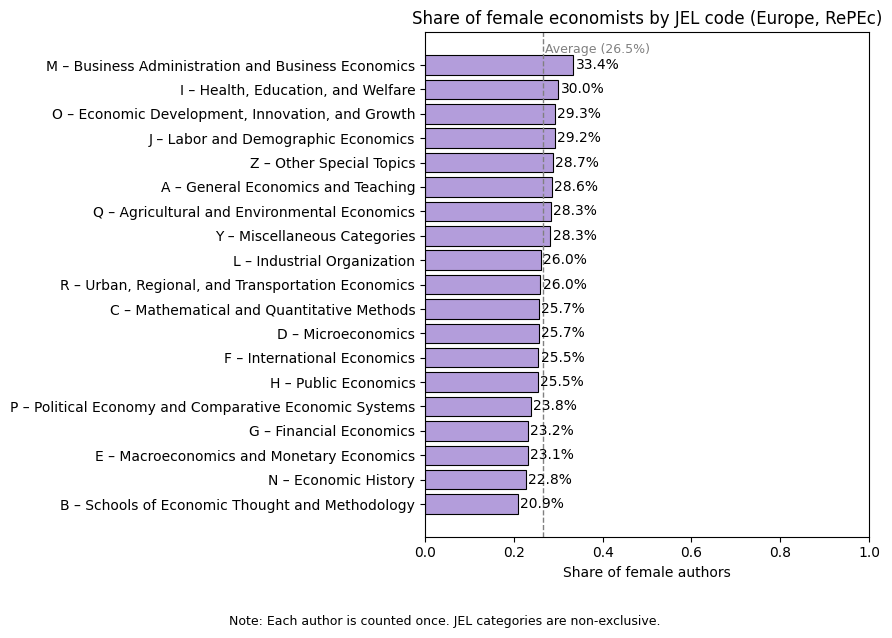

In [84]:
import matplotlib.pyplot as plt

# --- dictionnaire JEL (si pas déjà défini) ---
jel_labels = {
    "A": "General Economics and Teaching",
    "B": "Schools of Economic Thought and Methodology",
    "C": "Mathematical and Quantitative Methods",
    "D": "Microeconomics",
    "E": "Macroeconomics and Monetary Economics",
    "F": "International Economics",
    "G": "Financial Economics",
    "H": "Public Economics",
    "I": "Health, Education, and Welfare",
    "J": "Labor and Demographic Economics",
    "L": "Industrial Organization",
    "M": "Business Administration and Business Economics",
    "N": "Economic History",
    "O": "Economic Development, Innovation, and Growth",
    "P": "Political Economy and Comparative Economic Systems",
    "Q": "Agricultural and Environmental Economics",
    "R": "Urban, Regional, and Transportation Economics",
    "Y": "Miscellaneous Categories",
    "Z": "Other Special Topics"
}

# --- préparation des données ---
plot_df = (
    jel_gender_table[["JEL Subject", "female"]]
    .assign(JEL_description=lambda x: x["JEL Subject"].map(jel_labels))
    .sort_values("female", ascending=True)
    .reset_index(drop=True)
)

# --- graphique ---
plt.figure(figsize=(9, 6))

bars = plt.barh(
    plot_df["JEL Subject"],
    plot_df["female"],
    color="#b39ddb",      # violet doux
    edgecolor="black",    # encadré noir
    linewidth=0.8
)

# Axe y : code + description
plt.yticks(
    range(len(plot_df)),
    [
        f"{j} – {d}"
        for j, d in zip(plot_df["JEL Subject"], plot_df["JEL_description"])
    ]
)

plt.xlabel("Share of female authors")
plt.title("Share of female economists by JEL code (Europe, RePEc)")

# Limites axe x adaptées aux données
plt.xlim(0, 1)

# Annotations en %
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.005,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.1%}",
        va="center",
        fontsize=10
    )
avg_female = plot_df["female"].mean()

plt.axvline(
    avg_female,
    linestyle="--",
    color="grey",
    linewidth=1
)

plt.text(
    avg_female + 0.005,
    len(plot_df) - 0.5,
    f"Average ({avg_female:.1%})",
    color="grey",
    fontsize=9
)

# Note méthodologique
plt.figtext(
    0.5,
    -0.05,
    "Note: Each author is counted once. JEL categories are non-exclusive.",
    ha="center",
    fontsize=9
)
colors = [
    "#6b83b5" if i >= len(plot_df) - 3 else "#8da0cb"
    for i in range(len(plot_df))
]

plt.tight_layout()
plt.show()


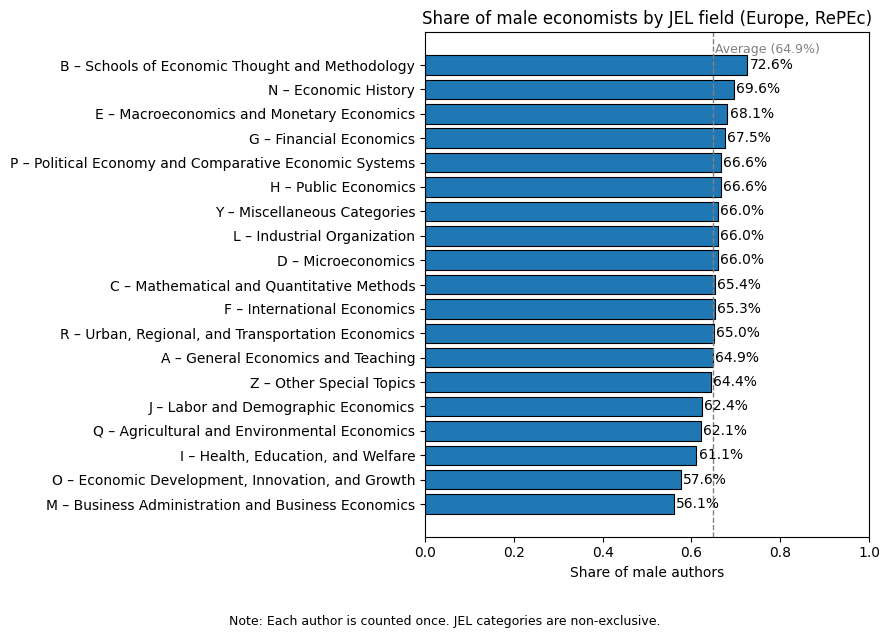

In [ ]:
import matplotlib.pyplot as plt

# --- dictionnaire JEL (si pas déjà défini) ---
jel_labels = {
    "A": "General Economics and Teaching",
    "B": "Schools of Economic Thought and Methodology",
    "C": "Mathematical and Quantitative Methods",
    "D": "Microeconomics",
    "E": "Macroeconomics and Monetary Economics",
    "F": "International Economics",
    "G": "Financial Economics",
    "H": "Public Economics",
    "I": "Health, Education, and Welfare",
    "J": "Labor and Demographic Economics",
    "L": "Industrial Organization",
    "M": "Business Administration and Business Economics",
    "N": "Economic History",
    "O": "Economic Development, Innovation, and Growth",
    "P": "Political Economy and Comparative Economic Systems",
    "Q": "Agricultural and Environmental Economics",
    "R": "Urban, Regional, and Transportation Economics",
    "Y": "Miscellaneous Categories",
    "Z": "Other Special Topics"
}

# --- préparation des données ---
plot_df = (
    jel_gender_table[["JEL Subject", "male"]]
    .assign(JEL_description=lambda x: x["JEL Subject"].map(jel_labels))
    .sort_values("male", ascending=True)
    .reset_index(drop=True)
)

# --- graphique ---
plt.figure(figsize=(9, 6))

bars = plt.barh(
    plot_df["JEL Subject"],
    plot_df["male"],
    color="#1f78b4",      # bleu foncé
    edgecolor="black",
    linewidth=0.8
)

# Axe y : code + description
plt.yticks(
    range(len(plot_df)),
    [
        f"{j} – {d}"
        for j, d in zip(plot_df["JEL Subject"], plot_df["JEL_description"])
    ]
)

plt.xlabel("Share of male authors")
plt.title("Share of male economists by JEL field (Europe, RePEc)")

# Limites axe x adaptées aux données
plt.xlim(0,1)

# Annotations en %
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.005,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.1%}",
        va="center",
        fontsize=10
    )
avg_female = plot_df["male"].mean()

plt.axvline(
    avg_female,
    linestyle="--",
    color="grey",
    linewidth=1
)

plt.text(
    avg_female + 0.005,
    len(plot_df) - 0.5,
    f"Average ({avg_female:.1%})",
    color="grey",
    fontsize=9
)

# Note méthodologique
plt.figtext(
    0.5,
    -0.05,
    "Note: Each author is counted once. JEL categories are non-exclusive.",
    ha="center",
    fontsize=9
)
colors = [
    "#6b83b5" if i >= len(plot_df) - 3 else "#8da0cb"
    for i in range(len(plot_df))
]

plt.tight_layout()
plt.show()


In [ ]:
df1["location"].head()

0                Stockholm, Sweden
1                   Firenze, Italy
2                Helsinki, Finland
3    Santiago de Compostela, Spain
4                    Lille, France
Name: location, dtype: object

In [85]:
import pandas as pd

# Copie de sécurité
df = df1.copy()

# Extraire le pays = dernière partie après la virgule
df["country"] = (
    df["location"]
    .astype(str)
    .str.split(",")
    .str[-1]
    .str.strip()
)

df[["location", "country"]]


,location,country
0,"Stockholm, Sweden",Sweden
1,"Firenze, Italy",Italy
2,"Helsinki, Finland",Finland
3,"Santiago de Compostela, Spain",Spain
4,"Lille, France",France
...,...,...
34078,"Nottingham, United Kingdom",United Kingdom
34079,"Southampton, United Kingdom",United Kingdom
34080,"Egham, United Kingdom",United Kingdom
34081,"London, United Kingdom",United Kingdom


In [86]:
df["country"].value_counts()

country
Germany           5553
United Kingdom    4790
France            4757
Italy             4193
Spain             3116
Netherlands       1640
Romania           1211
Belgium           1195
Sweden             957
Portugal           931
Poland             847
Austria            684
Greece             672
Czech Republic     657
Denmark            532
Hungary            493
Ireland            446
Finland            315
Bulgaria           273
Luxembourg         213
Slovakia           175
Croatia            161
Cyprus              61
Estonia             59
Slovenia            51
Lithuania           48
Latvia              36
Malta               13
Iran                 3
Lebanon              1
Name: count, dtype: int64

In [87]:
# Nettoyage
df["share_pct_clean"] = (
    df["share_pct"]
    .astype(str)
    .str.replace("%", "", regex=False)
)

df["share_pct_clean"] = pd.to_numeric(
    df["share_pct_clean"],
    errors="coerce"
)

# 👉 ICI la correction clé
df["share_pct_clean"] = df["share_pct_clean"].fillna(100)

# Poids final
df["weight"] = df["share_pct_clean"] / 100




In [88]:
df[["share_pct", "share_pct_clean", "weight"]].head(10)


,share_pct,share_pct_clean,weight
0,100,100,1.00
1,73%,73,0.73
2,100,100,1.00
3,100,100,1.00
4,100,100,1.00
5,100,100,1.00
6,100,100,1.00
7,50%,50,0.50
8,50%,50,0.50
9,100,100,1.00


In [89]:
country_gender = (
    df.groupby("country")
      .apply(lambda g: pd.Series({
          "female_weight": g.loc[g["gender"]=="female", "weight"].sum(),
          "total_weight": g["weight"].sum()
      }))
      .reset_index()
)

country_gender["female_share"] = (
    country_gender["female_weight"] / country_gender["total_weight"]
)

country_gender.head()


/tmp/ipykernel_515662/1887195602.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


,country,female_weight,total_weight,female_share
0,Austria,125.24,552.70,0.226597
1,Belgium,201.66,890.01,0.226582
2,Bulgaria,106.50,250.50,0.425150
3,Croatia,69.75,155.99,0.447144
4,Cyprus,7.50,47.78,0.156969


In [ ]:
pip install geodatasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [geodatasets]
Note: you may need to restart the kernel to use updated packages.


In [90]:
import zipfile

zip_path = "ne_110m_admin_0_countries.zip"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall("ne_countries")


In [91]:
import geopandas as gpd

world = gpd.read_file("ne_countries/ne_110m_admin_0_countries.shp")


In [92]:
world.columns


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)

In [93]:
country_name_map = {
    "Czech Republic": "Czechia",
}

country_gender["country"] = country_gender["country"].replace(country_name_map)


In [96]:
europe_map = europe.merge(
    country_gender,
    left_on="ADMIN",
    right_on="country",
    how="left"
)


In [97]:
import matplotlib.colors as mcolors

bins = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60]

labels = [
    "10–20%",
    "20–30%",
    "30–40%",
    "40–50%",
    "50–60%"
]


europe_map["female_share_bin"] = pd.cut(
    europe_map["female_share"],
    bins=bins,
    labels=labels,
    include_lowest=True
)


In [32]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


In [98]:
europe_map["female_share"].describe()

count    26.000000
mean      0.294190
std       0.084327
min       0.191377
25%       0.226816
50%       0.288172
75%       0.332295
max       0.538198
Name: female_share, dtype: float64

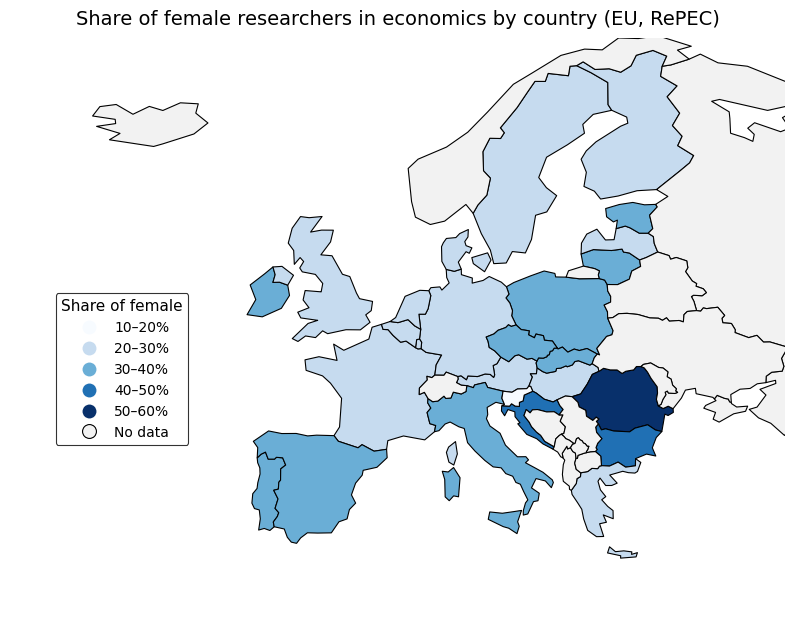

In [99]:
fig, ax = plt.subplots(figsize=(10, 8))

europe_map.plot(
    column="female_share_bin",
    cmap="Blues",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    missing_kwds={"color": "#f2f2f2", "label": "No data"},
    ax=ax
)

# Zoom Europe
ax.set_xlim(-32
, 40)
ax.set_ylim(30, 71)
ax.axis("off")

ax.set_title(
    "Share of female researchers in economics by country (EU, RePEC)",
    fontsize=14,
    pad=10
)

# Améliorer la légende
leg = ax.get_legend()

# Titre
leg.set_title("Share of female", prop={"size": 11})

# Texte plus lisible
for txt in leg.get_texts():
    txt.set_fontsize(10)

# Placement : bas gauche, intégr
leg.set_bbox_to_anchor((0.05, 0.3))
leg._loc = 3  # lower left

# Style
leg.get_frame().set_facecolor("white")
leg.get_frame().set_edgecolor("black")
leg.get_frame().set_linewidth(0.8)




In [95]:
europe = world[world["CONTINENT"] == "Europe"].copy()


In [38]:
fig = plt.figure(figsize=(11, 8))
gs = GridSpec(1, 2, width_ratios=[20, 1], wspace=0.05)

ax = fig.add_subplot(gs[0])
cax = fig.add_subplot(gs[1])

europe_map.plot(
    column="female_share",
    cmap="viridis",
    vmin=0.20,
    vmax=0.45,
    linewidth=0.4,
    edgecolor="black",
    legend=True,
    cax=cax,
    missing_kwds={"color": "#f2f2f2"},
    ax=ax
)

# Zoom Europe
ax.set_xlim(-25, 45)
ax.set_ylim(34, 72)
ax.axis("off")

# Titre de la figure
ax.set_title(
    "Share of female researchers in economics by country (UE, Repec)",
    fontsize=14,
    pad=10
)

# Colorbar
cax.set_ylabel("Share of female researchers", fontsize=10)
cax.tick_params(labelsize=9)

# Note
plt.figtext(
    0.1, 0.04,
    "Notes: Authors are weighted by affiliation shares. "
    ,
    fontsize=8
)

plt.tight_layout()
plt.show()



NameError: name 'plt' is not defined

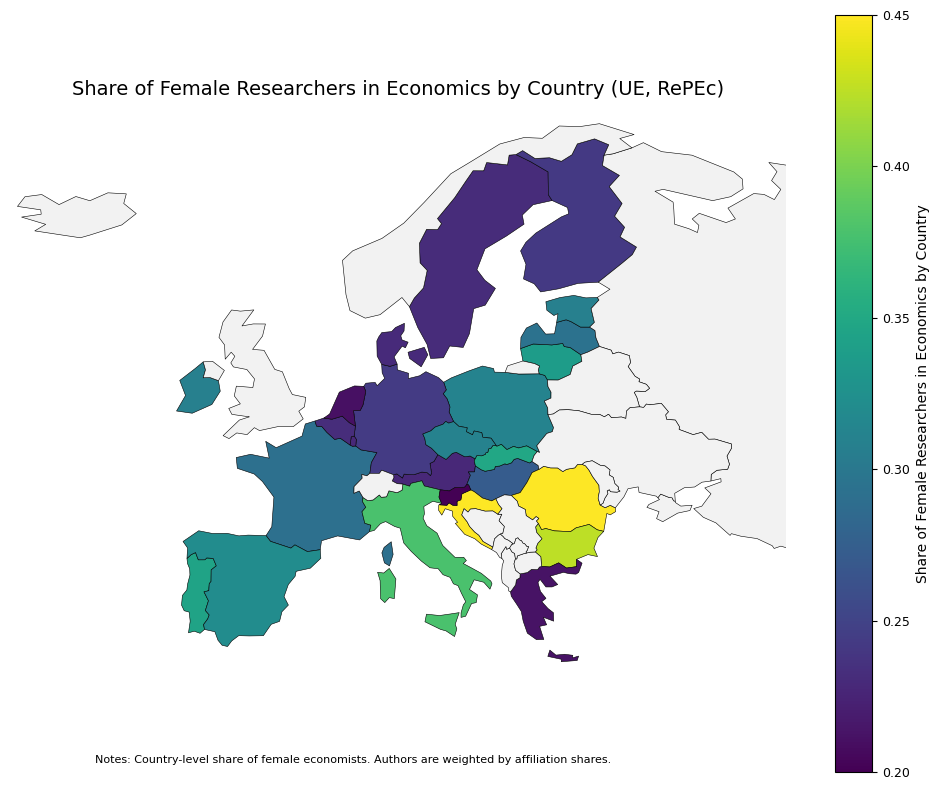

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

europe_map.plot(
    column="female_share",
    cmap="viridis",
    vmin=0.20,
    vmax=0.45,
    linewidth=0.4,
    edgecolor="black",
    legend=True,
    missing_kwds={"color": "#f2f2f2"},
    ax=ax
)

ax.set_title(
    "Share of Female Researchers in Economics by Country (UE, RePEc)",
    fontsize=14,
    pad=12
)

ax.set_xlim(-25, 45)
ax.set_ylim(34, 72)
ax.axis("off")

# Colorbar formatting
cbar = ax.get_figure().axes[-1]
cbar.set_ylabel("Share of Female Researchers in Economics by Country", fontsize=10)
cbar.tick_params(labelsize=9)

plt.figtext(
    0.1, 0.04,
    "Notes: Country-level share of female economists. Authors are weighted by affiliation shares. "
    ,
    fontsize=8
)

plt.tight_layout()
plt.show()



In [ ]:
df["country"].value_counts()

country
Germany           5553
France            4757
Italy             4193
Spain             3116
Netherlands       1640
Romania           1211
Belgium           1195
Sweden             957
Portugal           931
Poland             847
Austria            686
Greece             672
Czech Republic     657
Denmark            532
Hungary            493
Ireland            446
Finland            315
Bulgaria           273
Luxembourg         213
Slovakia           175
Croatia            161
Cyprus              61
Estonia             59
Slovenia            51
Lithuania           48
Latvia              36
Malta               13
Iran                 3
Lebanon              1
Name: count, dtype: int64

In [ ]:
country_gender["country"].value_counts


<bound method IndexOpsMixin.value_counts of 0         Austria
1         Belgium
2        Bulgaria
3         Croatia
4          Cyprus
5         Czechia
6         Denmark
7         Estonia
8         Finland
9          France
10        Germany
11         Greece
12        Hungary
13           Iran
14        Ireland
15          Italy
16         Latvia
17        Lebanon
18      Lithuania
19     Luxembourg
20          Malta
21    Netherlands
22         Poland
23       Portugal
24        Romania
25       Slovakia
26       Slovenia
27          Spain
28         Sweden
Name: country, dtype: object>